In [498]:
import numpy as np
import matplotlib.pyplot as plt

In [499]:
def func_value(a, x):
    return np.round(a * x * (1 - x), 8)


def generate_func_values(a, initial_value, range_number):
    x = [func_value(a, initial_value)]
    for i in range(1, range_number):
        x.append(func_value(a, x[i - 1]))
    return x

In [500]:
def generate_sequence(time_series, dimension, delay):
    seq = np.array([time_series[0 : len(time_series) - delay * dimension]])
    if delay * dimension > len(time_series):
        return []
    for i in range(1, dimension):
        seq = np.append(
            seq,
            [time_series[i * delay : len(time_series) - delay * (dimension - i)]],
            axis=0,
        )
    return seq.T

In [501]:
def compute_eig(sequences):
    cov_mat = np.cov(sequences)
    eigv, eigh = np.linalg.eig(cov_mat)
    eigv = np.array(eigv).flatten()
    eigh = np.array(eigh).flatten()
    eig = np.array([eigv, eigv]).flatten()
    return np.round(np.sort(eig, kind="mergesort")[::-1], 8)

In [502]:
def generate_error(eig, dimension):
    return [np.round(np.sqrt(eig[i + 1]), 8) for i in range(dimension)]

In [503]:
def get_stable_value_index(err):
    val = [err[0]]
    idx = [1]
    for i in range(1, len(err)):
        if err[i - 1] != err[i]:
            val.append(err[i])
            idx.append(i + 1)
    return (val, idx)

In [504]:
a = 2
initial_value = 0.1
range_number = 500
dimension = 100
delay = 1

In [505]:
time_series = generate_func_values(a, initial_value, range_number)
sequences = generate_sequence(time_series, dimension, delay)
eig = compute_eig(sequences)
err = generate_error(eig, dimension)
val, idx = get_stable_value_index(err)

In [506]:
a = [0, 1, 2, 4, 5]
a[1::]

[1, 2, 4, 5]

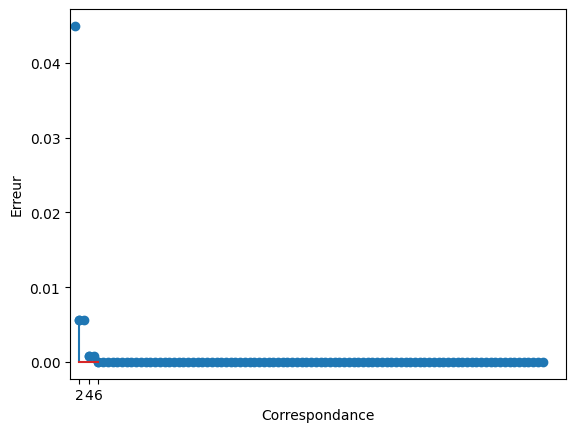

In [507]:
fig, ax = plt.subplots()
ax.set_xlabel("Correspondance")
ax.set_ylabel("Erreur")
ax.plot(np.array(range(1, dimension + 1)), err, "o")
ax.stem(idx[1::], val[1::])
ax.set_xlim(left=0)
ax.set_xticks(idx[1::], labels=idx[1::])
plt.show()